In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
df = pd.read_csv('icecream.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [3]:
df.rename(columns = {'DATE':'date','IPN31152N':'production'},inplace=True)
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [4]:
start_date = pd.to_datetime('2010-1-1')
df = df[start_date:]
df.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [5]:
df.shape

(121, 1)

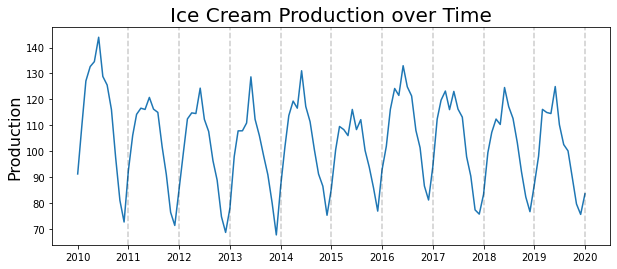

In [6]:
plt.figure(figsize=(10,4))
plt.plot(df.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

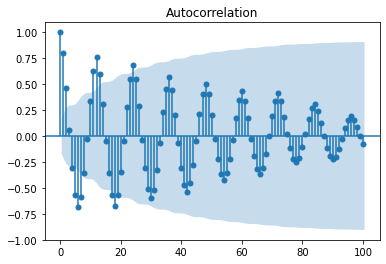

In [7]:
acf_plot = plot_acf(df.production,lags=100)

#### Based on decaying ACF, we are likely dealing with an Auto Regressive process

## PACF

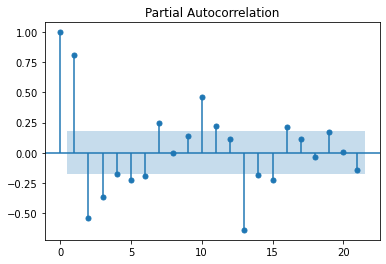

In [8]:
pacf_plot = plot_pacf(df.production)

#### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [9]:
import yfinance as yf
tickersymbol = 'SPY'
tickerData = yf.Ticker(tickersymbol)
tickerDf = tickerData.history(period='1d',start = '2015-1-3',end = '2020-1-1')
tickerDf = tickerDf[['Close']]
tickerDf.head()

,Close
Date,
2015-01-02,183.525574
2015-01-05,180.211166
2015-01-06,178.513748
2015-01-07,180.738266
2015-01-08,183.945465


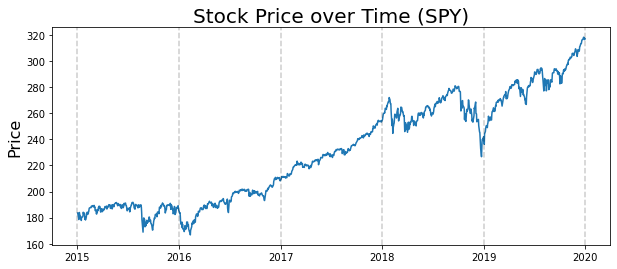

In [10]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickersymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

##### Stationarity: take first difference of this series

In [11]:
tickerDf['First_difference'] = tickerDf.Close - tickerDf.Close.shift(1)
tickerDf.head()

,Close,First_difference
Date,,
2015-01-02,183.525574,NaN
2015-01-05,180.211166,-3.314407
2015-01-06,178.513748,-1.697418
2015-01-07,180.738266,2.224518
2015-01-08,183.945465,3.207199


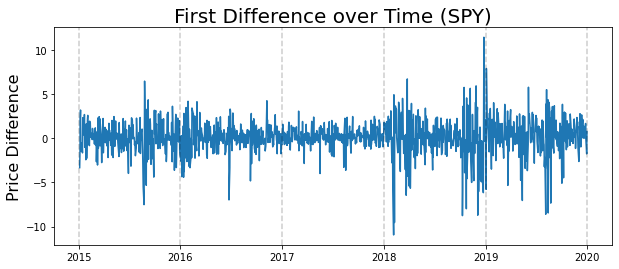

In [12]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.First_difference)
plt.title('First Difference over Time (%s)'%tickersymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.2)

# ACF

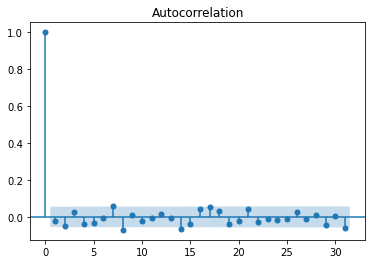

In [13]:
acf_plot = plot_acf(tickerDf.First_difference.iloc[1:])

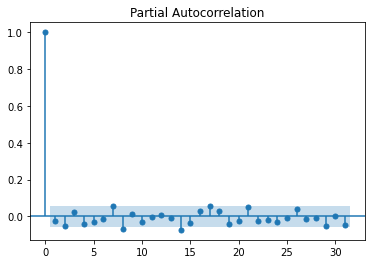

In [14]:
pacf_plot = plot_pacf(tickerDf.First_difference.iloc[1:])